In [1]:
# Install library for reading JPK File
%pip uninstall pyafmreader --yes
%pip install Cython
%pip install git+https://github.com/jlopezalo/pyafmreader.git

Found existing installation: pyafmreader x.x.x
Uninstalling pyafmreader-x.x.x:
  Successfully uninstalled pyafmreader-x.x.x
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmreader.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-89evgt87
  Running command git clone --filter=blob:none --quiet https://github.com/jlopezalo/pyafmreader.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-89evgt87
  Resolved https://github.com/jlopezalo/pyafmreader.git to commit 5059bdda1b8287c5358bed04bf8bef8566fd3160
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/TkTech/fasterzip.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-p8vedzr7/fasterzip_b1362721b1d1416497f49861a96

In [2]:
# Install library for AFM data Rheology Analysis
%pip uninstall pyafmrheo --yes
%pip install git+https://github.com/jlopezalo/pyafmrheo.git

Found existing installation: pyafmrheo 0.0.1
Uninstalling pyafmrheo-0.0.1:
  Successfully uninstalled pyafmrheo-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmrheo.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-08_ncdsj
  Running command git clone --filter=blob:none --quiet https://github.com/jlopezalo/pyafmrheo.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-08_ncdsj
  Resolved https://github.com/jlopezalo/pyafmrheo.git to commit 91fc5d5f0fbb583af343a7ba3bbb5e8fe2474d68
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for pyafmrheo, since package 'wheel' is not installed.
  Running setup.py install for pyafmrheo ... done

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries we will need
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import kv

# Get file reader from library
from pyafmreader import loadfile
from pyafmrheo.routines.NonContactCal import doNonContactCal

In [4]:
path_ar = '/Users/javierlopez/Documents/Datasets/09-12-2021/AIR-thermal-noise-data_vDeflection_2021.12.02-15.30.03.tnd'
path_lq = '/Users/javierlopez/Documents/Datasets/09-12-2021/LIQUID-thermal-noise-data_vDeflection_2021.12.09-11.33.23.tnd'

In [ ]:
thermal_file_ar = loadfile(path_ar)
thermal_file_lq = loadfile(path_lq)

In [5]:
ampl_raw_ar = thermal_file_ar[0]
ampl_ar = thermal_file_ar[1]
freq_ar = thermal_file_ar[2]
params_ar = thermal_file_ar[4]

In [ ]:
params_ar

In [6]:
ampl_raw_lq = thermal_file_lq[0]
ampl_lq = thermal_file_lq[1]
freq_lq = thermal_file_lq[2]
params_lq = thermal_file_lq[4]

In [7]:
params_lq

{'sensitivity': 1.61772e-08,
 'spring constant': 0.098,
 'parameter.f': 22990.0,
 'parameter.Q': '1.827',
 'parameter.A': 4.679e-05,
 'parameter.noise': 122.5,
 'parameter.Corrected K': '2.487×10⁻¹⁷',
 'parameter.Corrected Vertical K': '2.565×10⁻¹⁷',
 'settings.method': 'Contact-free',
 'settings.temperature': 25.0,
 'settings.environment': 'Water',
 'settings.environment density': 997000.0,
 'settings.environment viscosity': 0.00089,
 'cantilever.name': 'PFQNM-LC',
 'cantilever.width': 4.5e-06,
 'cantilever.length': 5.4e-05,
 'cantilever.angle': '10° + 0.0 °',
 'cantilever.correction factor': '0.9000',
 'Channels': "'Frequency' 'Vertical Deflection' 'average' 'fit-data' ",
 'Units': "'Hz' 'V²/Hz' 'V²/Hz' 'V²/Hz'"}

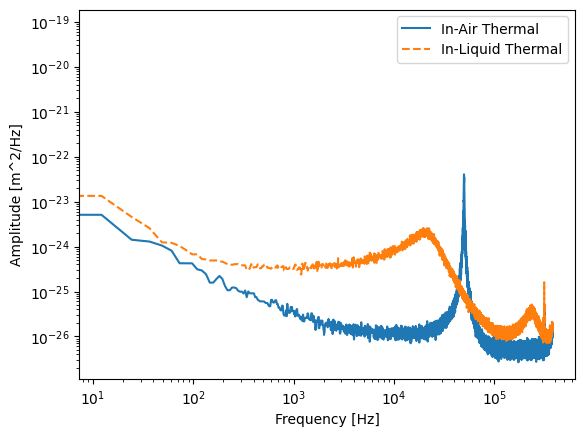

In [21]:
# plt.plot(freq, ampl)
plt.plot(freq_ar, ampl_ar,'-', label='In-Air Thermal')
plt.plot(freq_lq, ampl_lq, '--', label='In-Liquid Thermal')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [m^2/Hz]')
plt.legend()
plt.show()

In [28]:
cantiparams = {}
cantiparams['cantiWidth'] = params_ar['cantilever.width']
cantiparams['cantiLen'] = params_ar['cantilever.length']
cantiparams['cantiWidthLegs'] = 0
cantiparams['cantType'] = cantType 

inair_res = doNonContactCal(
freq_ar, ampl_raw_ar, cantiparams, 'air', Tc, RH, k0=None, CorrFact=0.9,
initSHOparams=None, Beta=None, Chi=None, invOLSscaling=None,
minfreq=minfreq, maxfreq=maxfreq, GCIusername="", GCIpassword="", selectedCantCode=""
)

inliquid_res = doNonContactCal(
freq_lq, ampl_raw_lq, cantiparams, 'water', Tc, RH, k0=None, CorrFact=0.9,
initSHOparams=None, Beta=None, Chi=None, invOLSscaling=None,
minfreq=minfreq, maxfreq=maxfreq, GCIusername="", GCIpassword="", selectedCantCode=""
)

print('In-Air Results:', *inair_res)
print('In-Liquid Results:', *inliquid_res)

In-Air Results: 0.038859219449631284 nan 2.0753784679228917e-08 2.0753784679228913e-08
In-Liquid Results: 0.02719044104887647 nan 2.701072746515229e-08 2.701072746515229e-08
